In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np

In [40]:
#read csv
nash_crime_df=pd.read_csv('../data/Nashville/Metro_Nashville.csv')
nash_unemployment_df=pd.read_csv('../data/Nashville/Unemployment_Nashville-Davidson.csv')
nash_population_df=pd.read_csv('../data/Nashville/Nashville_population.csv')
louis_crime_df=pd.read_csv('../data/Louisville_Data/Louisville_Crime_Data_2023.csv')
louis_population_df=pd.read_csv('../data/Louisville_Data/Louisville_Population.csv')
louis_unemployment_df=pd.read_csv('../data/Louisville_Data/Unemployment Rate_Louisville_Jefferson County.csv')
birm_unemployment_df=pd.read_csv('../data/Birmingham_Data/Unemployment Rate_Birmingham-Hoover.csv')
birm_population_df=pd.read_csv('../data/Birmingham_Data/Alabama.csv')
birm_crime_north_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_south_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_west_df=pd.read_excel('../data/Birmingham_Data/open-data-west-2023.xlsx')
birm_crime_east_df=pd.read_excel('../data/Birmingham_Data/opendataportal-east-2023.xlsx')                                  
                                  

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_8808/2456356997.py:2: DtypeWarning: Columns (10,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  nash_crime_df=pd.read_csv('../data/Nashville/Metro_Nashville.csv')
/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_8808/2456356997.py:5: DtypeWarning: Columns (0,10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  louis_crime_df=pd.read_csv('../data/Louisville_Data/Louisville_Crime_Data_2023.csv')


In [41]:
nash_crime_df.head()

,Event Number,Call Received,Complaint Number,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Shift,Sector,Zone,RPA,Latitude,Longitude,Mapped Location
0,PD202100625493,10/02/2021 07:13:21 PM,NaN,71,BURGLARY - NON-RESIDENCE,A,ALARM,11,DISREGARD / SIGNAL 9,NaN,NaN,NaN,B,H,523,9557.0,NaN,NaN,NaN
1,PD202100626631,10/03/2021 11:25:42 AM,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,4,ASSISTED CITIZEN,NaN,NaN,513A,A,H,513,9033.0,NaN,NaN,NaN
2,PD202100626031,10/03/2021 12:54:02 AM,NaN,46,VEHICLE ACCIDENT - PERSONAL INJURY,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,NaN,NaN,C,S,323,8889.0,NaN,NaN,NaN
3,PD202100622285,10/01/2021 08:05:43 AM,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,200.0,OLD HICKORY BLVD,123A,A,NaN,136W,0.0,36.079,-86.919,POINT (-86.919 36.079)
4,PD202100621219,09/30/2021 06:48:20 PM,2.021051e+10,40,SUSPICIOUS PERSON,TS,TERRY STOP,6,ASSISTED OTHER UNIT,NaN,NaN,2P63,B,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
nash_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUCA474000000000004,2021,M01,2021 Jan,54892
1,LAUCA474000000000004,2021,M02,2021 Feb,52123
2,LAUCA474000000000004,2021,M03,2021 Mar,50828
3,LAUCA474000000000004,2021,M04,2021 Apr,48648
4,LAUCA474000000000004,2021,M05,2021 May,45838


In [43]:
nash_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUCA474000000000004,2021,M01,2021 Jan,54892
1,LAUCA474000000000004,2021,M02,2021 Feb,52123
2,LAUCA474000000000004,2021,M03,2021 Mar,50828
3,LAUCA474000000000004,2021,M04,2021 Apr,48648
4,LAUCA474000000000004,2021,M05,2021 May,45838


In [106]:
louis_crime_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5


In [116]:
louis_crime_df['Offense_Classification']

0           23 THEFT OTHER
1           23 THEFT OTHER
2           23 THEFT OTHER
3             24 VANDALISM
4         19 THEFT FR BLDG
               ...        
65559       23 THEFT OTHER
65560    99 NON-REPORTABLE
65561        14 AUTO THEFT
65562    99 NON-REPORTABLE
65563      21 THEFT FR VEH
Name: Offense_Classification, Length: 65564, dtype: object

In [121]:
Offense_name=louis_crime_df['Offense_Classification'].str.extract(r'(\d+)\s+(.*)')
Offense_name.rename(columns={0: 'Number',1: 'Offense_Classification'})
louis_crime_df1=louis_crime_df.copy()
louis_crime_df1[['Number','Offense_Classification']]=louis_crime_df1['Offense_Classification'].str.extract(r'(\d+)\s+(.*)')
louis_crime_df1.head()
#new_id_column=gourds_df['id'].str.split("-", expand=True)
#new_id_column.rename(columns={0: 'Year',1: 'Type'})
#df['Offense_Code_Name'].str.split(r'\$(\d+)', expand=True)
#gourds_df2=gourds_df.copy()
#gourds_df2[['Year', 'Type']]=gourds_df2['id'].str.split("-", expand=True)
#gourds_df2.head(5)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Number
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,23
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,23
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,23
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4,24
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5,19


In [102]:
louis_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2
4,LAUMT213114000000003,2021,M05,2021 May,3.8


In [48]:
louis_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2
4,LAUMT213114000000003,2021,M05,2021 May,3.8


In [50]:
birm_unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1
1,LAUMT011382000000003,2021,M02,2021 Feb,3.8
2,LAUMT011382000000003,2021,M03,2021 Mar,3.4
3,LAUMT011382000000003,2021,M04,2021 Apr,3.0
4,LAUMT011382000000003,2021,M05,2021 May,2.9


In [51]:
birm_population_df.head()

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1
1,LAUMT011382000000003,2021,M02,2021 Feb,3.8
2,LAUMT011382000000003,2021,M03,2021 Mar,3.4
3,LAUMT011382000000003,2021,M04,2021 Apr,3.0
4,LAUMT011382000000003,2021,M05,2021 May,2.9


In [52]:
birm_crime_north_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120


In [53]:
birm_crime_south_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120


In [86]:
most_common_crime_Birm=birm_crime_south_df['Case Offense Statute Description'].value_counts().idxmax()
most_common_crime_Birm

'Theft of Property Auto Theft 1st '

In [54]:
birm_crime_west_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Disch Firearm into Occupied Bldg/Veh,W429
1,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Aggravated Assault Non-Family-Gun-2nd Degree,W429
2,600,CANDLE LN,33.541728,-86.865778,35214.0,11/30/2023 21:58:00,Theft from Residence 4th Degree,W439
3,1500,51ST ST,33.483066,-86.890583,35208.0,11/30/2023 17:00:00,Theft of Property Auto Theft 1st,W432
4,1100,4TH AVE W,33.506463,-86.856604,35204.0,11/30/2023 16:00:00,Aggravated Assault Family-Gun-2nd Degree,W430


In [73]:
birm_crime_east_df.shape

(2061, 10)

In [70]:
top_ten_common_crime_nashville=nash_crime_df['Tencode Description'].value_counts()
top_ten_common_crime_nashville.head(10)

Tencode Description
WANT OFFICER FOR INVESTIGATION / ASSISTA    1226023
BUSINESS CHECK                              1020241
TRAFFIC VIOLATION                            882040
COMMUNITY POLICING ACTIVITY                  325463
THEFT                                        309015
VEHICLE ACCIDENT - PROPERTY DAMAGE           284896
DISORDERLY PERSON                            269791
SAFETY HAZARD                                241462
BURGLARY - NON-RESIDENCE                     203160
SUSPICIOUS PERSON                            198973
Name: count, dtype: int64

In [63]:
#What are the most common types of crimes reported in each of the three cities, and how do they compare?
most_common_crime_nashville=nash_crime_df['Tencode Description'].value_counts().idxmax()
most_common_crime_nashville

'WANT OFFICER FOR INVESTIGATION / ASSISTA'

In [131]:
louis_crime_df[['Offense_Text', 'Offense_Numbers']] = louis_crime_df['Offense_Code_Name'].str.extract(r'(.+?)\s*(\$?\d+.*)', expand=True)
louis_crime_df[['Offense_Text', 'Offense_Numbers']]

In [133]:
louis_crime_df[['Offense_Text', 'Offense_Numbers']]=louis_crime_df['Offense_Code_Name'].str.extract(r'(.+?)\s*(\$?\d+.*)', expand=True)
louis_crime_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense_Text,Offense_Numbers
0,LMPD23121718,12/11/2023,2023/12/09 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,1st Division,123,Residence/Home,800 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40203,1,THEFT OF MAIL MATTER,514.140 23265 23H
1,LMPD23121610,12/11/2023,2023/12/01 05:00:00+00,8585.0,23 THEFT OTHER,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE 5...,23H,A,Yes,7th Division,724,Convenience Store,11800 BLOCK STANDIFORD PLAZA DR,LOUISVILLE,40229,2,THEFT OF PROP MISLAID OR DELIVER BY IMISTAKE,514.050(1) 23472 23H
2,LMPD23121685,12/11/2023,2023/12/10 05:00:00+00,8142.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $10,000 < $1,000,000 5...",23H,A,Yes,3rd Division,323,Parking/ Drop Lot/ Garage,1200 BLOCK OUTER LOOP,LOUISVILLE,40219,3,TBUT OR DISP ALL OTHERS,"$10,000 < $1,000,000 514.030 24098 23H"
3,LMPD23121633,12/11/2023,2023/12/09 05:00:00+00,8142.0,24 VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE 512.040 01403 290,290,A,Yes,7th Division,723,Residence/Home,7500 BLOCK FARMHOUSE LN,LOUISVILLE,40291,4,CRIMINAL MISCHIEF-,3RD DEGREE 512.040 01403 290
4,LMPD23121790,12/11/2023,2023/12/10 05:00:00+00,5597.0,19 THEFT FR BLDG,"TBUT OR DISP FROM BUILDING $1,000 < $10,000 51...",23D,A,Yes,5th Division,512,Service/Gas Station,1100 BLOCK BARDSTOWN RD,LOUISVILLE,40204,5,TBUT OR DISP FROM BUILDING,"$1,000 < $10,000 514.030 24162 23D"


In [136]:
#top ten crime reported in Louisville, KY
top_ten_common_crime_louisville=louis_crime_df['Offense_Text'].value_counts()
top_ten_common_crime_louisville.head(10)

Offense_Text
TBUT OR DISP AUTO                           6565
ASSAULT -                                   5648
DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT    5129
CRIMINAL MISCHIEF-                          3781
TBUT OR DISP CONTENTS FROM VEH              3748
BURGLARY -                                  3223
TERRORISTIC THREATENING                     2597
TBUT OR DISP SHOPLIFTING                    2463
CRIMINAL MISCHIEF -                         2306
TBUT OR DISP ALL OTHERS                     2094
Name: count, dtype: int64

In [138]:
#most common types of crimes #Theft by Unlawful Taking
most_common_crime_louisville=louis_crime_df['Offense_Text'].value_counts().idxmax()
most_common_crime_louisville


'TBUT OR DISP AUTO'

In [80]:
birm_crime_df = pd.concat([birm_crime_north_df, birm_crime_south_df, birm_crime_east_df, birm_crime_west_df], ignore_index=True)
birm_crime_df.head() #6269 rows × 10 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131,NaN,NaN
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120,NaN,NaN


In [88]:
case_offense_column=birm_crime_df['Case Offense Statute Description']
case_offense_column

0                  Theft-From Public Building-1st Degree
1              Larceny/Theft-Shoplifting, less than $500
2                      Theft of Property Auto Theft 1st 
3                                     Theft by deception
4                        Theft from Residence 4th Degree
                              ...                       
6264               Domestic Strangulation or Suffocation
6265    Sodomy-With A Woman-Domestic Violence-1st Degree
6266            Aggravated Assault Family-Gun-1st Degree
6267                Disch Firearm into Occupied Bldg/Veh
6268                Disch Firearm into Occupied Bldg/Veh
Name: Case Offense Statute Description, Length: 6269, dtype: object

In [82]:
#top ten crime reported in Birmingham, AL
top_ten_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_common_crime_Birmingham.head(10)

Case Offense Statute Description
Theft of Property Auto Theft 1st             1323
Disch Firearm into Occupied Bldg/Veh          502
Burglary (Residence) Force 3rd Degree         458
Miscellaneous Theft-3rd Degree                404
Theft - TOP 2nd Degree                        362
Larceny/Theft-Shoplifting, less than $500     272
Burglary-Residence-No Force-3rd Degree        215
Theft-Firearms-2nd Degree                     175
Domestic Strangulation or Suffocation         167
Larceny/Theft-TOP 2 $500-less than $1500      152
Name: count, dtype: int64

In [85]:
#most common types of crimes
most_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts().idxmax()
most_common_crime_Birmingham

'Theft of Property Auto Theft 1st '

In [149]:
#visualisation to compare the three cities
top_ten_common_crime_louisville=louis_crime_df['Offense_Text'].value_counts()
top_ten_common_crime_nashville=nash_crime_df['Tencode Description'].value_counts()
top_ten_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts()


#gourds_df['est_weight'] = pd.to_numeric(gourds_df['est_weight'], errors='coerce')
#gourds_df['weight_lbs'] = pd.to_numeric(gourds_df['weight_lbs'], errors='coerce')


In [150]:
#frequency = df['column_name'].value_counts(normalize=True)
#print(frequency)

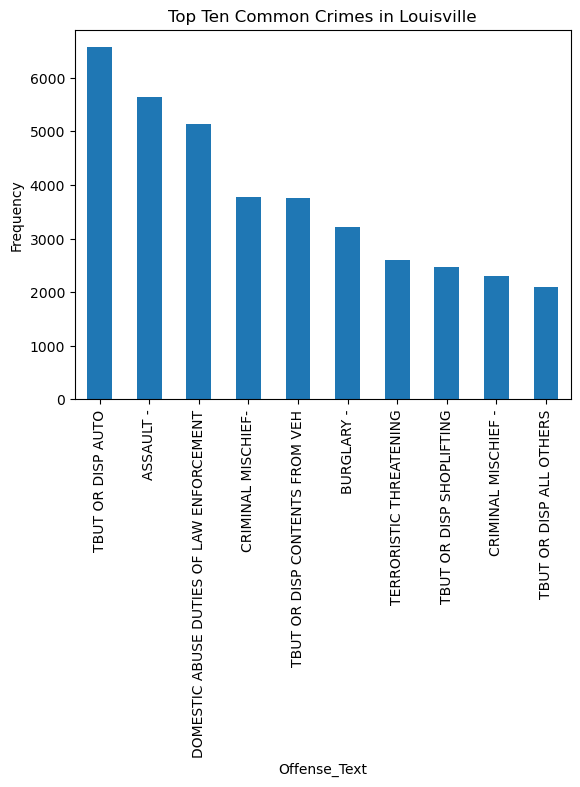

In [151]:
top_ten_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts()
top_ten_common_crime_louisville.head(10).plot(kind='bar')
plt.title('Top Ten Common Crimes in Louisville')
plt.xlabel('Offense_Text')
plt.ylabel('Frequency')
plt.show()

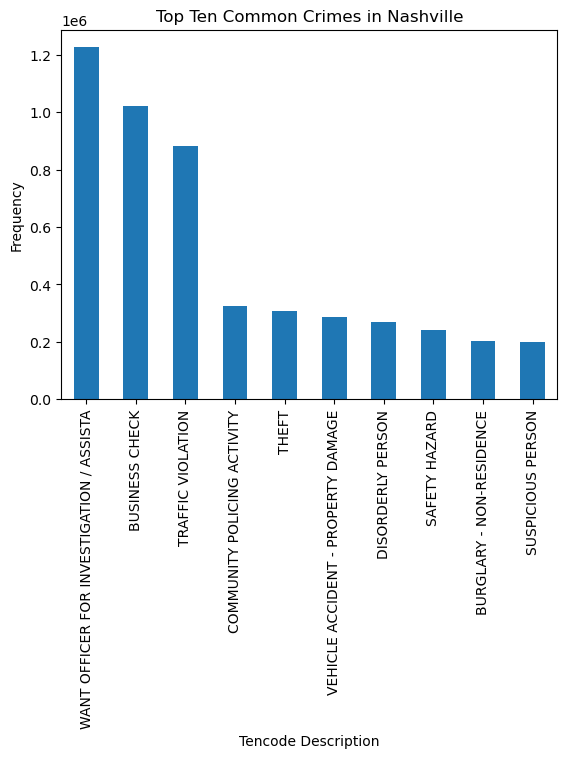

In [152]:
top_ten_common_crime_nashville = nash_crime_df['Tencode Description'].value_counts()
top_ten_common_crime_nashville.head(10).plot(kind='bar')
plt.title('Top Ten Common Crimes in Nashville')
plt.xlabel('Tencode Description')
plt.ylabel('Frequency')
plt.show()

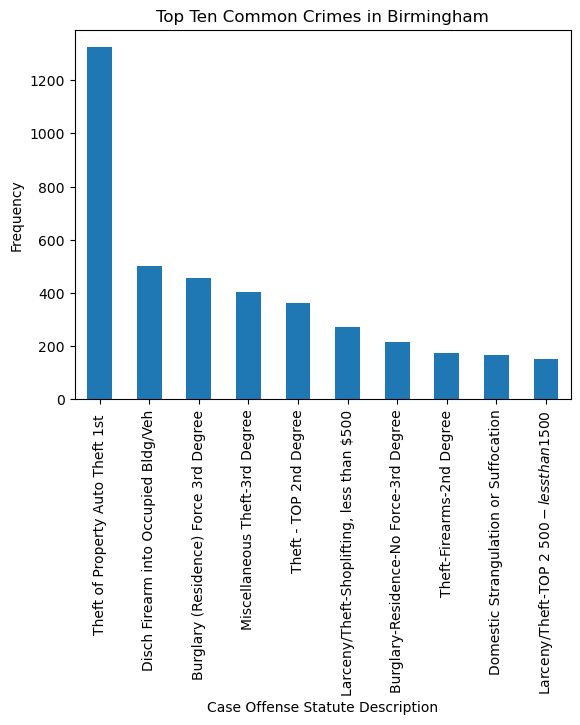

In [153]:
top_ten_common_crime_Birmingham = birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_common_crime_Birmingham.head(10).plot(kind='bar')
plt.title('Top Ten Common Crimes in Birmingham')
plt.xlabel('Case Offense Statute Description')
plt.ylabel('Frequency')
plt.show()

In [154]:
#accross three cities
combined_crimes = pd.DataFrame({
    'Louisville': top_ten_common_crime_louisville,
    'Nashville': top_ten_common_crime_nashville,
    'Birmingham': top_ten_common_crime_Birmingham
    })

In [174]:
combined_crimes = pd.DataFrame({
    'Louisville': top_ten_common_crime_louisville,
    'Nashville': top_ten_common_crime_nashville,
    'Birmingham': top_ten_common_crime_Birmingham
})

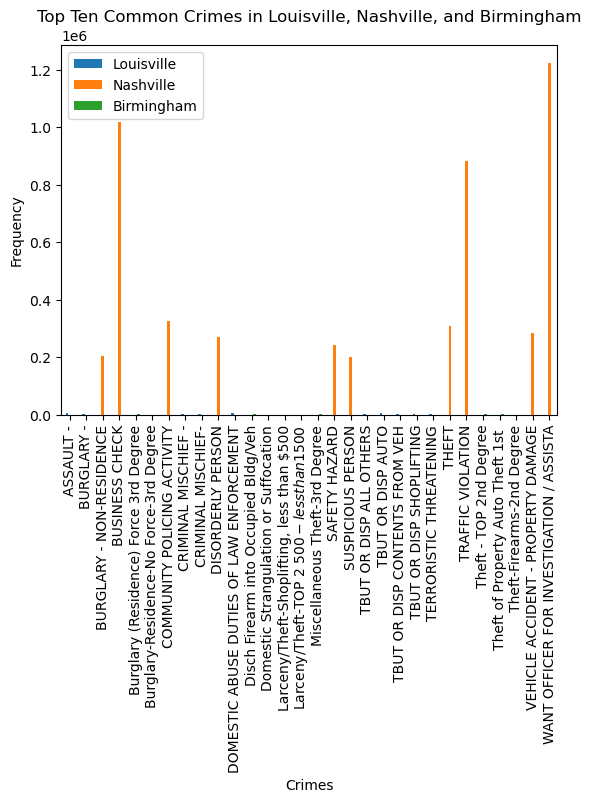

In [175]:
#visualisation to compare the three cities #Nashville has a higher crime rate
combined_crimes.plot(kind='bar')
plt.title('Top Ten Common Crimes in Louisville, Nashville, and Birmingham')
plt.xlabel('Crimes')
plt.ylabel('Frequency')
plt.show()

In [159]:
top_three_common_crime_Birmingham=birm_crime_df['Case Offense Statute Description'].value_counts()
top_three_common_crime_Birmingham.head(3)

Case Offense Statute Description
Theft of Property Auto Theft 1st         1323
Disch Firearm into Occupied Bldg/Veh      502
Burglary (Residence) Force 3rd Degree     458
Name: count, dtype: int64

In [160]:
top_three_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts()
top_three_common_crime_louisville.head(3)

Offense_Text
TBUT OR DISP AUTO                           6565
ASSAULT -                                   5648
DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT    5129
Name: count, dtype: int64

In [161]:
top_three_common_crime_nashville = nash_crime_df['Tencode Description'].value_counts()
top_three_common_crime_nashville.head(3)

Tencode Description
WANT OFFICER FOR INVESTIGATION / ASSISTA    1226023
BUSINESS CHECK                              1020241
TRAFFIC VIOLATION                            882040
Name: count, dtype: int64

In [171]:
top_ten_common_crime_louisville = louis_crime_df['Offense_Text'].value_counts().head(10)
top_ten_common_crime_nashville = nash_crime_df['Tencode Description'].value_counts().head(10)
top_ten_common_crime_Birmingham = birm_crime_df['Case Offense Statute Description'].value_counts().head(10)

In [172]:
combined_crimes = pd.DataFrame({
    'Louisville': top_ten_common_crime_louisville,
    'Nashville': top_ten_common_crime_nashville,
    'Birmingham': top_ten_common_crime_Birmingham
})

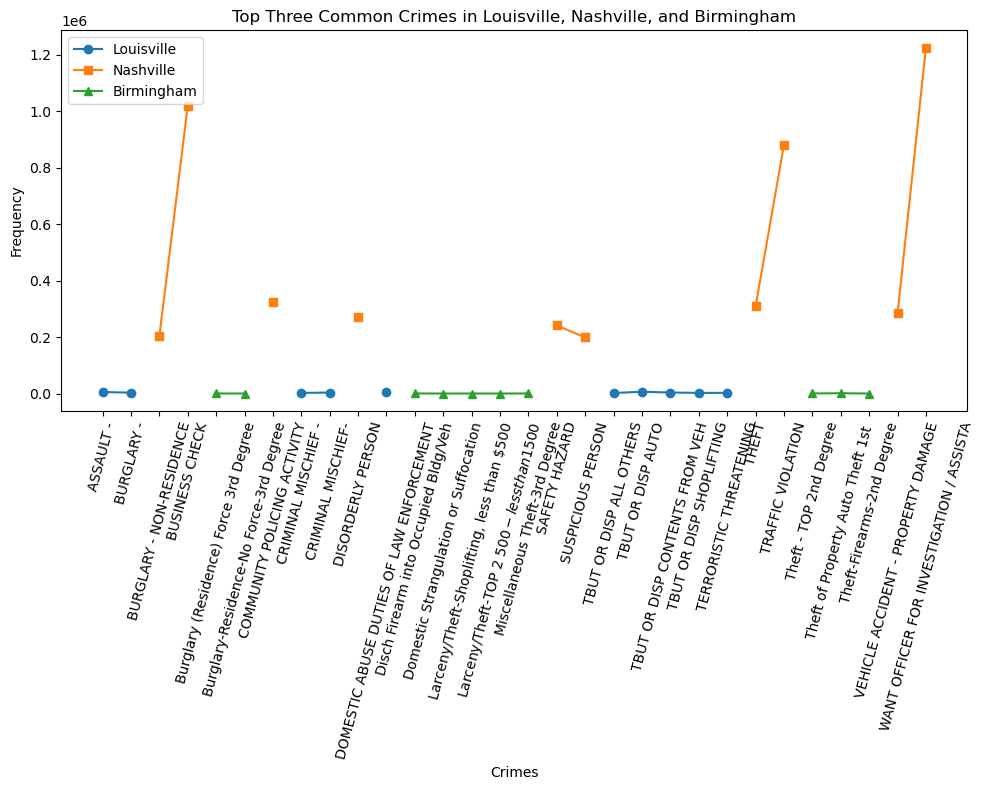

In [173]:
combined_crimes.reset_index(inplace=True)
plt.figure(figsize=(10, 8))
plt.plot(combined_crimes['index'], combined_crimes['Louisville'], label='Louisville', marker='o')
plt.plot(combined_crimes['index'], combined_crimes['Nashville'], label='Nashville', marker='s')
plt.plot(combined_crimes['index'], combined_crimes['Birmingham'], label='Birmingham', marker='^')

plt.title('Top Ten Common Crimes in Louisville, Nashville, and Birmingham')
plt.xlabel('Crimes')
plt.ylabel('Frequency')
plt.xticks(rotation=75) 
plt.legend()
plt.tight_layout() 
plt.show()

In [181]:
#Are there any discernible patterns in the times of day or days of the week 
#when crimes are most frequently reported in each city?
#nash_crime_df.head()
time_pattern=nash_crime_df.groupby('Call Received')['Tencode Description'].avg
time_pattern

#avg_est_weight=gourds_df2.groupby('Type')['est_weight'].mean(
#avg_est_weight

AttributeError: 'SeriesGroupBy' object has no attribute 'avg'

In [182]:
nash_crime_df.head()

,Event Number,Call Received,Complaint Number,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Shift,Sector,Zone,RPA,Latitude,Longitude,Mapped Location
0,PD202100625493,10/02/2021 07:13:21 PM,NaN,71,BURGLARY - NON-RESIDENCE,A,ALARM,11,DISREGARD / SIGNAL 9,NaN,NaN,NaN,B,H,523,9557.0,NaN,NaN,NaN
1,PD202100626631,10/03/2021 11:25:42 AM,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,4,ASSISTED CITIZEN,NaN,NaN,513A,A,H,513,9033.0,NaN,NaN,NaN
2,PD202100626031,10/03/2021 12:54:02 AM,NaN,46,VEHICLE ACCIDENT - PERSONAL INJURY,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,NaN,NaN,C,S,323,8889.0,NaN,NaN,NaN
3,PD202100622285,10/01/2021 08:05:43 AM,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,200.0,OLD HICKORY BLVD,123A,A,NaN,136W,0.0,36.079,-86.919,POINT (-86.919 36.079)
4,PD202100621219,09/30/2021 06:48:20 PM,2.021051e+10,40,SUSPICIOUS PERSON,TS,TERRY STOP,6,ASSISTED OTHER UNIT,NaN,NaN,2P63,B,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nash_crime_df['Call Received'] = pd.to_datetime(nash_crime_df['Call Received'])
nash_crime_df['Time of Day'] = nash_crime_df['Call Received'].dt.time
nash_crime_df['Day of Week'] = nash_crime_df['Call Received'].dt.dayofweek
nash_crime_df = crime_data.groupby(['Day of Week', 'Time of Day']).size().reset_index(name='Counts')
nash_crime_df